# Marginal 1-dim posteriors from image data

- Using SWYFT core functions (i.e. look at swyft/core.py)
- Demonstrates `head` network

Author: Christoph Weniger and Benjamin Miller, August 2020

In [1]:
import numpy as np
import pylab as plt
import swyft
import torch
from scipy import stats
%load_ext autoreload
%autoreload 2

np.random.seed(25)
torch.manual_seed(25)

In [26]:
DEVICE = 'cuda:0'
NDIM = 2 # number of parameters
NBINS = 1000
SIGMA = 0.01

In [48]:
# A toy model with a diffuse and point source component

def model(z, sigma = SIGMA, w = 0.4):
    x = z + np.random.randn(2)*sigma + (np.random.rand(2)-0.5)*w
    return x

In [50]:
z0 = np.array([0.5, 0.5])
x0 = model(z0)
print(x0)

[0.40688023 0.48651438]


In [54]:
# Instantiate network

sw = swyft.SWYFT(x0, model, zdim = 2, device = DEVICE, head = None)

In [55]:
sw.run(nrounds = 1, max_epochs = 5, nsamples = 30000)

100%|██████████| 469/469 [00:00<00:00, 651.22it/s]


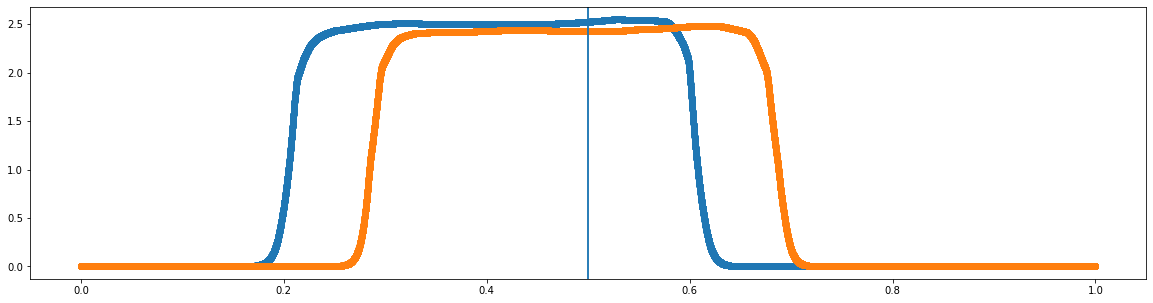

In [56]:
plt.figure(figsize=(20, 5))
for i in range(2):
    zgrid, lnLgrid = sw.posterior(i)
    plt.axvline(z0[i])
    plt.scatter(zgrid[:], np.exp(lnLgrid[:]))

In [58]:
sw.comb([[0, 1]], max_epochs = 5)

100%|██████████| 469/469 [00:00<00:00, 642.21it/s]


(0.0, 1.0)

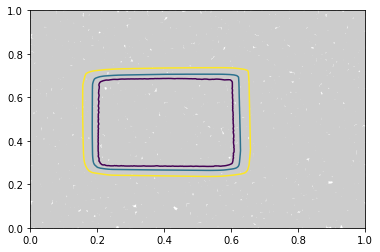

In [59]:
zgrid, lnLgrid = sw.posterior([0, 1])
plt.scatter(zgrid[:,0], zgrid[:,1], marker='.', color='0.8')
max_lnL = lnLgrid[:].max()
plt.tricontour(zgrid[:,0], zgrid[:,1], -lnLgrid+max_lnL, levels = [1, 4, 9])
plt.xlim([0, 1])
plt.ylim([0, 1])